In [1]:
import pandas as pd
import numpy as np

In [4]:
df=pd.read_csv("diabetes.csv")


In [5]:
#dataset describing
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
#dataset describing full information for viewing catagorical feature also
df.describe(include='all')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
#finding the shape of the data
df.shape

(768, 9)

In [10]:
#Finding the data type of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

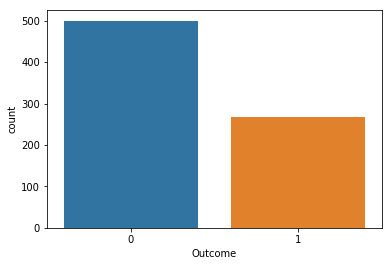

In [13]:
#visualizing the data outcome from model
import seaborn as sns
sns.countplot(df['Outcome'],label="Count")

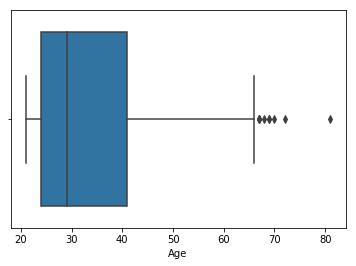

In [106]:
#Boxplot view for Age feature 
#Whiskers are  means your data has a high standard deviation and variance
#i.e the values are spread out and highly varying. If you have long whiskers on one side of the box but not the other, then your data may be highly varying only in one direction
sns.boxplot(df['Age'])

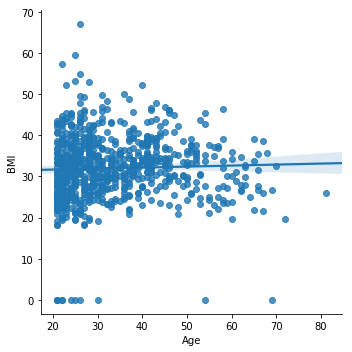

In [107]:
sns.lmplot(x='Age',y='BMI',data=df)

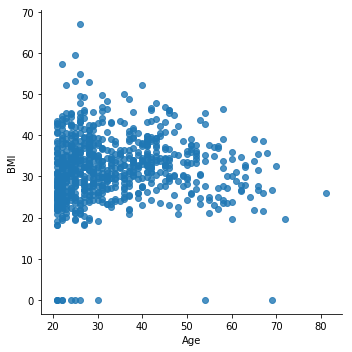

In [109]:
sns.lmplot(x='Age',y='BMI',data=df,fit_reg=False) # without Regression line

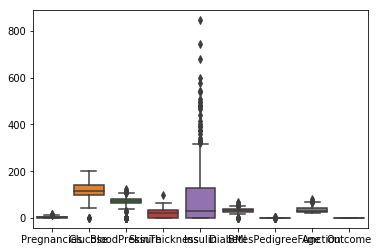

In [110]:
sns.boxplot(data=df)

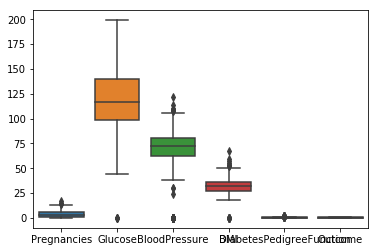

In [111]:
dataset= df.drop(['Insulin','SkinThickness','Age'],axis =1)
sns.boxplot(data=dataset)

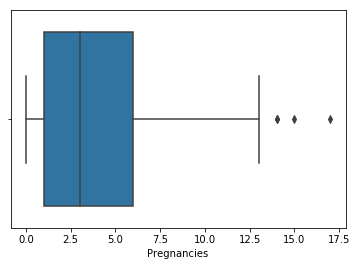

In [112]:
sns.boxplot(df['Pregnancies'])

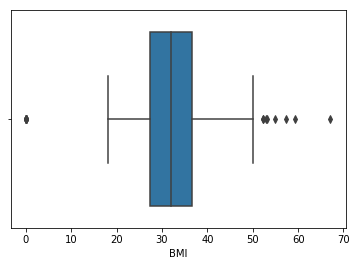

In [113]:
sns.boxplot(df['BMI'])

In [14]:
#finding the null values from dataset :
# Adding up the missing values (column-wise)
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

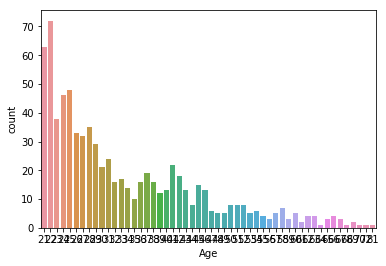

In [15]:
#Age data distribution 
sns.countplot(df['Age'],label="Count")

In [17]:
#finding out the duplicated count
df.duplicated().value_counts()

False    768
dtype: int64

In [18]:
# Checking for outliers in the continuous variables
out = df[['BMI','Age','BloodPressure','Insulin']]

In [20]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
out.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,BMI,Age,BloodPressure,Insulin
count,768.000000,768.000000,768.000000,768.000000
mean,31.992578,33.240885,69.105469,79.799479
std,7.884160,11.760232,19.355807,115.244002
min,0.000000,21.000000,0.000000,0.000000
25%,27.300000,24.000000,62.000000,0.000000
50%,32.000000,29.000000,72.000000,30.500000
75%,36.600000,41.000000,80.000000,127.250000
90%,41.500000,51.000000,88.000000,210.000000
95%,44.395000,58.000000,90.000000,293.000000
99%,50.759000,67.000000,106.000000,519.900000


In [16]:
#Splitting Data into Training and Test Sets
from sklearn.model_selection import train_test_split

In [22]:
# Putting feature variable to X
X = df.drop(['Outcome'],axis=1)

# Putting response variable to y
y = df['Outcome']

In [23]:

y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [24]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [25]:
# Building Logistic regression with feature elimination
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression().fit(X_train, y_train)


In [26]:
print("Training set accuracy: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(logreg.score(X_test, y_test)))

Training set accuracy: 0.790
Test set accuracy: 0.745


In [27]:
#Feature selection by different way and analysing the with fitting the model

import statsmodels.api as sm

In [28]:
#Feature selection by GLM approach
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  537
Model:                            GLM   Df Residuals:                      528
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -245.19
Date:                Thu, 08 Aug 2019   Deviance:                       490.37
Time:                        16:19:56   Pearson chi2:                     667.
No. Iterations:                     5   Covariance Type:             nonrobust
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -9.3762      0.908    -10.328      0.000     -11.155      -7.597
Pregnancies                  0.1084      0.039      2.803      0.005       0.033       0.184
Glucose                      0.0373      0.005      7.973      0.000       0.028       0.046
BloodPressure               -0.0096      0.006     -1.566      0.117      -0.022       0.002
SkinThickness               -0.0004      0.008     -0.048      0.962      -0.017       0.016
Insulin                     -0.0012      0.001     -1.103      0.270      -0.003       0.001
BMI                          0.0952      0.018      5.197      0.000       0.059       0.131
DiabetesPedigreeFunction     1.3783      0.367      3.758      0.000       0.659       2.097
Age                          0.0202      0.011      1.809      0.070      -0.002       0.042
============================================================================================
"""

In [ ]:
#By finding the Generlized linear model Glucose and BMI and Pregnancies are important feature to the model

In [29]:

# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

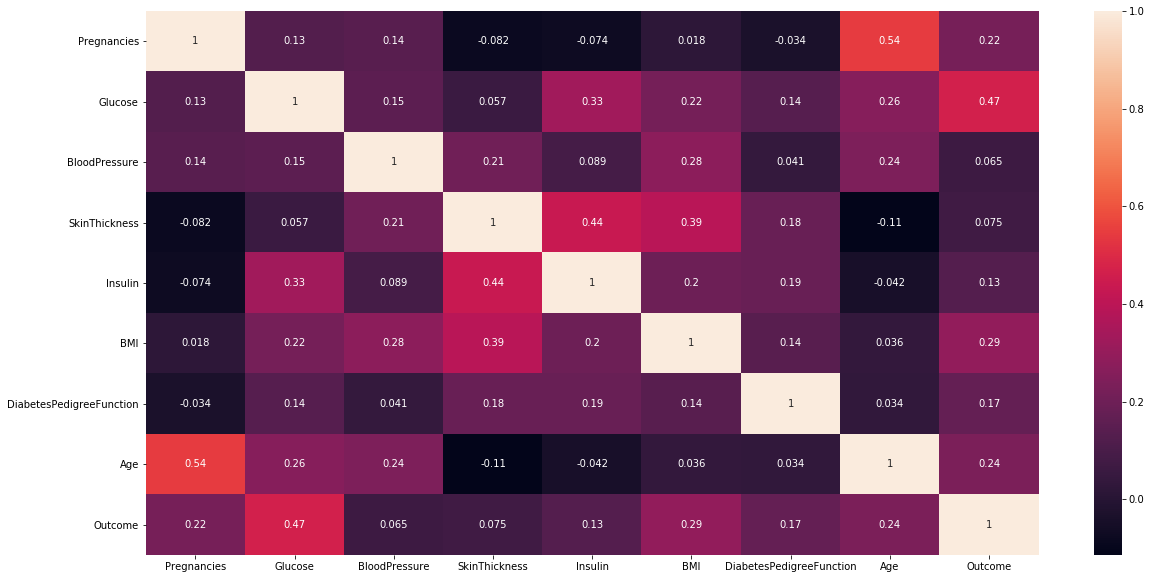

In [30]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(df.corr(),annot = True)

In [34]:
X_test2 = X_test.drop(['Insulin','SkinThickness','Age'],1)
X_train2 = X_train.drop(['Insulin','SkinThickness','Age'],1)

In [35]:
# After removing highly correleated columns little bit improvement in the model accuracy
logreg = LogisticRegression().fit(X_train2, y_train)
print("Training set accuracy: {:.3f}".format(logreg.score(X_train2, y_train)))
print("Test set accuracy: {:.3f}".format(logreg.score(X_test2, y_test)))

Training set accuracy: 0.791
Test set accuracy: 0.749


In [33]:
#feature selection by RFE approach
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 4)             # running RFE with 13 variables as output
rfe = rfe.fit(X,y)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)           # Printing the ranking

[ True  True False False False  True  True False]
[1 1 2 4 5 1 1 3]


In [53]:
# Variables selected by RFE
col = ['Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction']

In [54]:
logreg.fit(X_train[col], y_train)
logreg = LogisticRegression().fit(X_train[col], y_train)
print("Training set accuracy: {:.3f}".format(logreg.score(X_train[col], y_train)))
print("Test set accuracy: {:.3f}".format(logreg.score(X_test[col], y_test)))

Training set accuracy: 0.780
Test set accuracy: 0.758


In [38]:

# UDF for calculating vif value approach
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

In [41]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [49]:
# Calculating Vif value
vif_cal(input_data=df, dependent_col='Outcome')

,Var,Vif
5,BMI,18.41
1,Glucose,16.73
2,BloodPressure,14.62
7,Age,13.49
3,SkinThickness,4.01
0,Pregnancies,3.28
6,DiabetesPedigreeFunction,3.20
4,Insulin,2.06


In [51]:
# Variables selected by VIF droping the high VIF values 
col = ['SkinThickness', 'Pregnancies', 'DiabetesPedigreeFunction', 'Insulin']

In [52]:
logreg.fit(X_train[col], y_train)
logreg = LogisticRegression().fit(X_train[col], y_train)
print("Training set accuracy: {:.3f}".format(logreg.score(X_train[col], y_train)))
print("Test set accuracy: {:.3f}".format(logreg.score(X_test[col], y_test)))

Training set accuracy: 0.696
Test set accuracy: 0.675


In [ ]:
# Bias and variance get reduce but our model perdication % get reduced. since we are going to next model as Randomforest 

In [55]:
#Randomforest classifier
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(rf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.732


In [56]:
# Variables selected by RFE
col = ['Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction']
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train[col], y_train)
print("Accuracy on training set: {:.3f}".format(rf.score(X_train[col], y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test[col], y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.701


In [ ]:
#Above is the overfitted model, because its well trained on training data and fail to get the pattern on actual data.

In [57]:
# After removing highly correleated columns little bit improvement in the model accuracy
logreg = LogisticRegression().fit(X_train2, y_train)
print("Training set accuracy: {:.3f}".format(logreg.score(X_train2, y_train)))
print("Test set accuracy: {:.3f}".format(logreg.score(X_test2, y_test)))

Training set accuracy: 0.791
Test set accuracy: 0.749


In [58]:
#Model Evaluvation:
from sklearn import metrics

In [59]:
help(metrics.confusion_matrix)

Help on function confusion_matrix in module sklearn.metrics.classification:

confusion_matrix(y_true, y_pred, labels=None, sample_weight=None)
    Compute confusion matrix to evaluate the accuracy of a classification
    
    By definition a confusion matrix :math:`C` is such that :math:`C_{i, j}`
    is equal to the number of observations known to be in group :math:`i` but
    predicted to be in group :math:`j`.
    
    Thus in binary classification, the count of true negatives is
    :math:`C_{0,0}`, false negatives is :math:`C_{1,0}`, true positives is
    :math:`C_{1,1}` and false positives is :math:`C_{0,1}`.
    
    Read more in the :ref:`User Guide <confusion_matrix>`.
    
    Parameters
    ----------
    y_true : array, shape = [n_samples]
        Ground truth (correct) target values.
    
    y_pred : array, shape = [n_samples]
        Estimated targets as returned by a classifier.
    
    labels : array, shape = [n_classes], optional
        List of labels to index the m

In [80]:
# Predicted probabilities
y_pred = logreg.predict_proba(X_test2)

In [81]:
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)

In [82]:
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]

In [83]:
# Let's see the head
y_pred_1.head()

,1
0,0.224756
1,0.111024
2,0.530319
3,0.165626
4,0.488934


In [84]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [85]:

# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [86]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)


In [87]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'newout'})

In [88]:
y_pred_final.head()

,Outcome,newout
0,0,0.224756
1,0,0.111024
2,1,0.530319
3,0,0.165626
4,0,0.488934


In [89]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_pred_final['predicted'] = y_pred_final.newout.map( lambda x: 1 if x > 0.5 else 0)

In [90]:
y_pred_final.head()

,Outcome,newout,predicted
0,0,0.224756,0
1,0,0.111024,0
2,1,0.530319,1
3,0,0.165626,0
4,0,0.488934,0


In [91]:
confusion = metrics.confusion_matrix( y_pred_final.Outcome, y_pred_final.predicted )
confusion

array([[130,  20],
       [ 38,  43]], dtype=int64)

In [92]:

#Let's check the overall accuracy.
metrics.accuracy_score( y_pred_final.Outcome, y_pred_final.predicted)

0.7489177489177489

In [93]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [94]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.5308641975308642

In [95]:
# Let us calculate specificity
TN / float(TN+FP)

0.8666666666666667

In [96]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.13333333333333333


In [97]:
# positive predictive value 
print (TP / float(TP+FP))

0.6825396825396826


In [98]:

# Negative predictive value
print (TN / float(TN+ FN))

0.7738095238095238


In [99]:

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

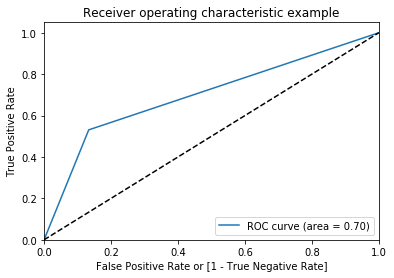

(array([0.        , 0.13333333, 1.        ]),
 array([0.       , 0.5308642, 1.       ]),
 array([2, 1, 0], dtype=int64))

In [100]:
draw_roc(y_pred_final.Outcome, y_pred_final.predicted)

In [101]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.Outcome.map( lambda x: 1 if x > i else 0)
y_pred_final.head()

,Outcome,newout,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.224756,0,0,0,0,0,0,0,0,0,0,0
1,0,0.111024,0,0,0,0,0,0,0,0,0,0,0
2,1,0.530319,1,1,1,1,1,1,1,1,1,1,1
3,0,0.165626,0,0,0,0,0,0,0,0,0,0,0
4,0,0.488934,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Model accuracy we got 70%